# DATA SCIENCE FUNDAMENTALS ASSIGNMENT : GROUP H TT9L


## A Research into World University Rankings : A Trend Analysis

What are the four questions we will investigate in our assignment?


> 1. "What are the global trends in university rankings across continents?"

> 2. "Why do universities from certain regions consistently rank lower than others despite high research, and citation performance?”

> 3. “Can we classify universities into rank tier (e.g., Top 200, Mid 400, bottom) based on their Quality of Education, Alumni Employment, Quality of Faculty, and World Rank?”

> 4. "What areas should a mid-ranked university invest in to improve its global ranking most effectively?"

Dataset Reference: https://www.kaggle.com/datasets/alifarajnia/eighteen-nineteen-university-datasets

# Exploring the Dataset

In [ ]:
#GOOGLE DRIVE SETUP
from google.colab import drive
import os

drive.mount('/content/drive')
drive_path = r"/content/drive/MyDrive/dsf_assignment_grouph/"

os.chdir(drive_path)
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/dsf_assignment_grouph


In [ ]:
#LIBRARY IMPORTS AND DATASET LOADING
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from IPython.display import display

from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv( "world_ranking_uni_dataset.csv", encoding='ISO-8859-1')

In [ ]:
df.shape

(1000, 12)

In [ ]:
# EXPLORING DATASET
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
df.info()

Dataset Overview:
   World Rank                            Institution        Location  \
0           1                     Harvard University             USA   
1           2                    Stanford University             USA   
2           3  Massachusetts Institute of Technology             USA   
3           4                University of Cambridge  United Kingdom   
4           5                   University of Oxford  United Kingdom   

   National Rank Quality of Education Alumni Employment Quality of Faculty  \
0              1                    2                 1                  1   
1              2                   10                 3                  2   
2              3                    3                11                  3   
3              1                    5                19                  6   
4              2                    9                25                 10   

  Research Output Quality Publications Influence Citations  Score  
0           

In [ ]:
#THIS IS USEFUL FOR MATCHING COUNTRIES TO CONTINENT; GOING TO BE USED LATER IN THE PROJECT
continent_map = {
    'Argentina': 'South America',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Belgium': 'Europe',
    'Brazil': 'South America',
    'Bulgaria': 'Europe',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Croatia': 'Europe',
    'Cyprus': 'Europe',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'Egypt': 'Africa',
    'Estonia': 'Europe',
    'Finland': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Iran': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Lebanon': 'Asia',
    'Lithuania': 'Europe',
    'Macau': 'Asia',
    'Malaysia': 'Asia',
    'Mexico': 'North America',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nigeria': 'Africa',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Russia': 'Europe',
    'Saudi Arabia': 'Asia',
    'Serbia': 'Europe',
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'South Korea': 'Asia',
    'Spain': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Taiwan': 'Asia',
    'Thailand': 'Asia',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'USA': 'North America',
    'Uganda': 'Africa',
    'United Kingdom': 'Europe',
    'Uruguay': 'South America'
}

In [ ]:
#Matching country with corresponding continent
df['continent'] = df['Location'].map(continent_map)
df['continent']

,continent
0,North America
1,North America
2,North America
3,Europe
4,Europe
...,...
995,Asia
996,Asia
997,Asia
998,Asia


# 1. "What are the global trends in university rankings across continents?"

In order to answer this question, we will investigate by implementing:

1. Box plots to compare rank distributions across continents
2. Heatmap to show average metric scores by continent
3. Scatter plots to visualize metric relationships by region

## Comparing rank distributions across continents

In [ ]:
df['World Rank'] = pd.to_numeric(df['World Rank'], errors = 'coerce')
df_box = df.dropna(subset=['continent', 'World Rank'])
#this is to ensure the national rank is numeric, and so that it drops rows where continent and rank is missing

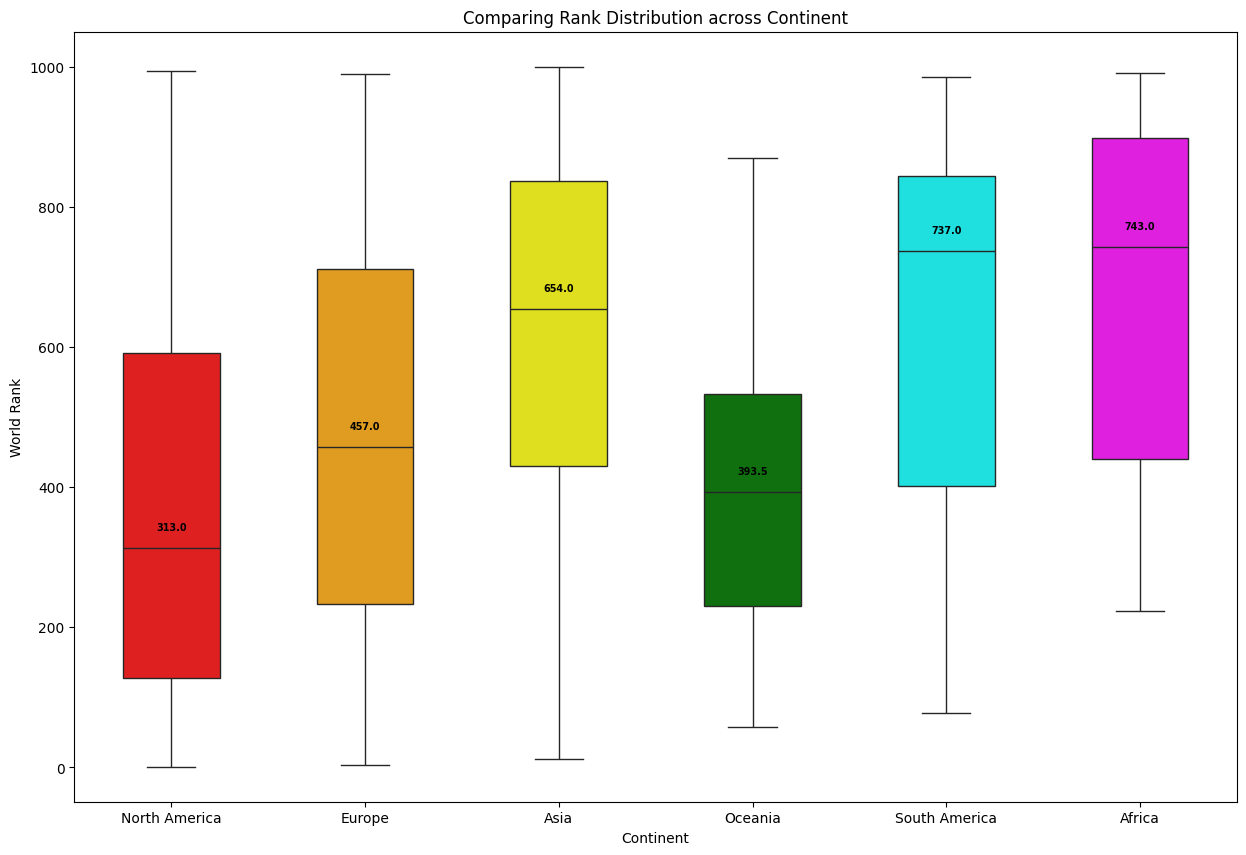

In [ ]:
plt.figure(figsize=(15,10))
bplot1 = sns.boxplot(x='continent',
                    y='World Rank',
                    hue='continent',
                    width=0.5,
                    data=df_box,
                    palette=['red', 'orange', 'yellow', 'green', 'cyan', 'magenta'])

medians = df_box.groupby(['continent'])['World Rank'].median()
vertical_offset = df_box['World Rank'].median() * 0.05

for xtick, label in enumerate(bplot1.get_xticklabels()):
    continent = label.get_text()
    median_val = medians[continent]
    bplot1.text(xtick, median_val + vertical_offset, round(median_val, 1),
                horizontalalignment='center', size='x-small', color='black', weight='semibold')


plt.ylabel('World Rank')
plt.xlabel('Continent')
plt.title('Comparing Rank Distribution across Continent')
plt.show()

From the information displayed in the box plot above, we are able to see that:
1. *North America* has the lowest world rank median, with a rank of 313.0. This suggests that universities on this continent have performed better globally (lower rank represents superior standing).
In contrast, the continent with the highest median world rank would be *Africa*, with a score of 743.0. This reflects that the general global rankings of universities in Africa is not on par with other continents.

2. The variability can be based on how wide the boxes are, or the IQR. in most of the continents, the variation of ranking is relatively similar when compared by the box sizes. However, the ones that stand out would be *Oceania,* and *Asia*, which indicates more consistent ranking performance within those continents (as represented by their boxplots compactness).

3. The continents that notably have lengthy whiskers would be *North America, Asia, Oceania,* and *South America*. This indicates that they have a wider range of rankings, where some universities are ranked extremely well, while others are ranked much lower.

4. When describing skewness, because we are dealing with ranks rather than parameters such as income or height, smaller numbers indicate a better performance.
  *   *North America's* boxplot is technically left-skewed (negatively skewed), meaning that most universities are situated at the top while a few universities at the bottom pull the entire spread upwards.
  *   *Asia and South America* appear right-skewed (positively skewed), indicating that despite having a few top universities from the said continents, there still appears to be many lower-ranked universities from these continents.
  *   In *Europe,* the distribution is very well symmetrical, which has ranks that are evenly distributed and there is little-to-no skewness. This suggests European universities have a more uniform distribution of their rankings.


## Showing average metric scores by continent

In [ ]:
metrics = [
    'Quality of Education',
    'Alumni Employment',
    'Quality of Faculty',
    'Quality Publications',
    'Research Output',
    'Influence',
    'Citations',
    'Score'
]

for col in metrics:
  df[col] = pd.to_numeric(df[col], errors='coerce')
#this ensures that the metric columns are converted from object to numeric

In [ ]:
df_heatmap = df.groupby('continent')[metrics].mean()
# this is to ensure that it takes the average metric scores by continent

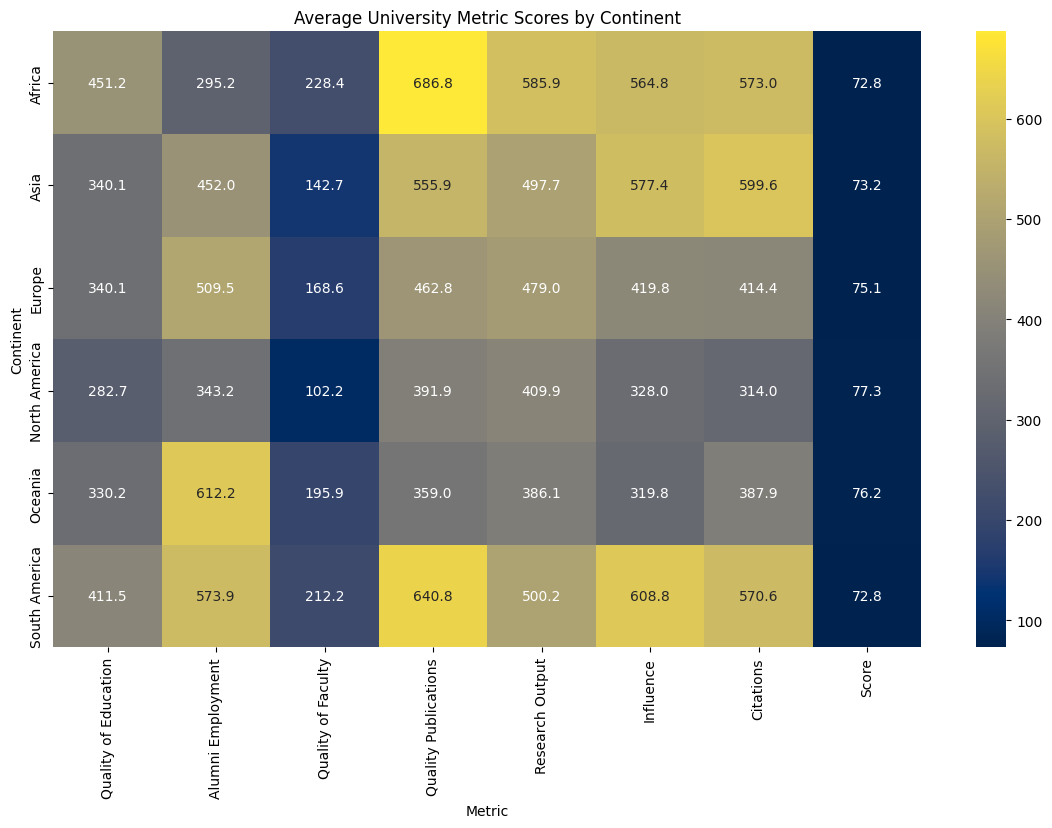

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df_heatmap, annot=True, cmap='cividis', fmt=".1f")
plt.title('Average University Metric Scores by Continent')
plt.xlabel('Metric')
plt.ylabel('Continent')
plt.show()

As a reminder, in this part of our analysis, we are to investigate the question “How strong are the average metric scores across continents?”

As reflected in the heatmap, *Africa* and *South America* outperform other continents for most of the metrics. Digging in deeper, these two continents performed significantly in metrics such as "Quality Publications, Research Output, Influence," and "Citations," conclusively implying its strongest suite would be in their research oriented profile.
However, this may be due to the fact that there is only 14 universities in *Africa* and 31 in *South America*, as compared to other continents like *North America*, with a staggering 245 universities contained in the dataset. This may mean that the data mainly consists of high ranked institutions from the two mentioned continents.

For *Oceania*, they have the highest "Alumni Employment," and they also have quite a well-balanced profile similar to *North America, Europe,* and *Asia*. Excluding *Africa* and *South America,* *Europe* seems to be the continent which records the highest averages for well rounded profiles in comparison to with its counterparts. But to having the highest score, *North America* is leading with a score of 77.3.

Here's how many universities are in each continent. Due to the amount of universities that are in each continent, it may reflect a smaller/larger sample of universities including from that continent, possibly only highly-ranked insitutitons.

In [ ]:
df_box.groupby(df_box['continent'])['World Rank'].nunique()

,World Rank
continent,
Africa,14
Asia,291
Europe,389
North America,245
Oceania,30
South America,31


## Visualize metric relationships by region

For this subsection, I believe these metric combinations would help provide a deeper insight into this sub-question:

1. "Quality of Faculty" vs "Research Output"
    - The assumption that we are going for is that "A strong faculty drives more research." If this is true, we may see how much faculty strength contributes to research productivity per continent.
2. "Alumni Employment" vs. "Score"
    - The assumption that we are going for is that "Universities that help students get jobs may score higher." If this is true, alumni employment is more crucial to a continent than what we thought.
3. "Citations" vs. "Quality Publications"
    - The assumption that we are going for is that "More impactful papers (citations) should come from higher quality publications." If this is true, this means that the continent's published work is actually being cited, which has more of a global impact than we we have thought.

### Quality of Faculty vs. Research Output

In [ ]:
df_visualize_metric_relationships = df.copy()
df_visualize_metric_relationships = df_visualize_metric_relationships.dropna(subset=['Quality of Faculty', 'Research Output', 'continent'])
#data cleaning first

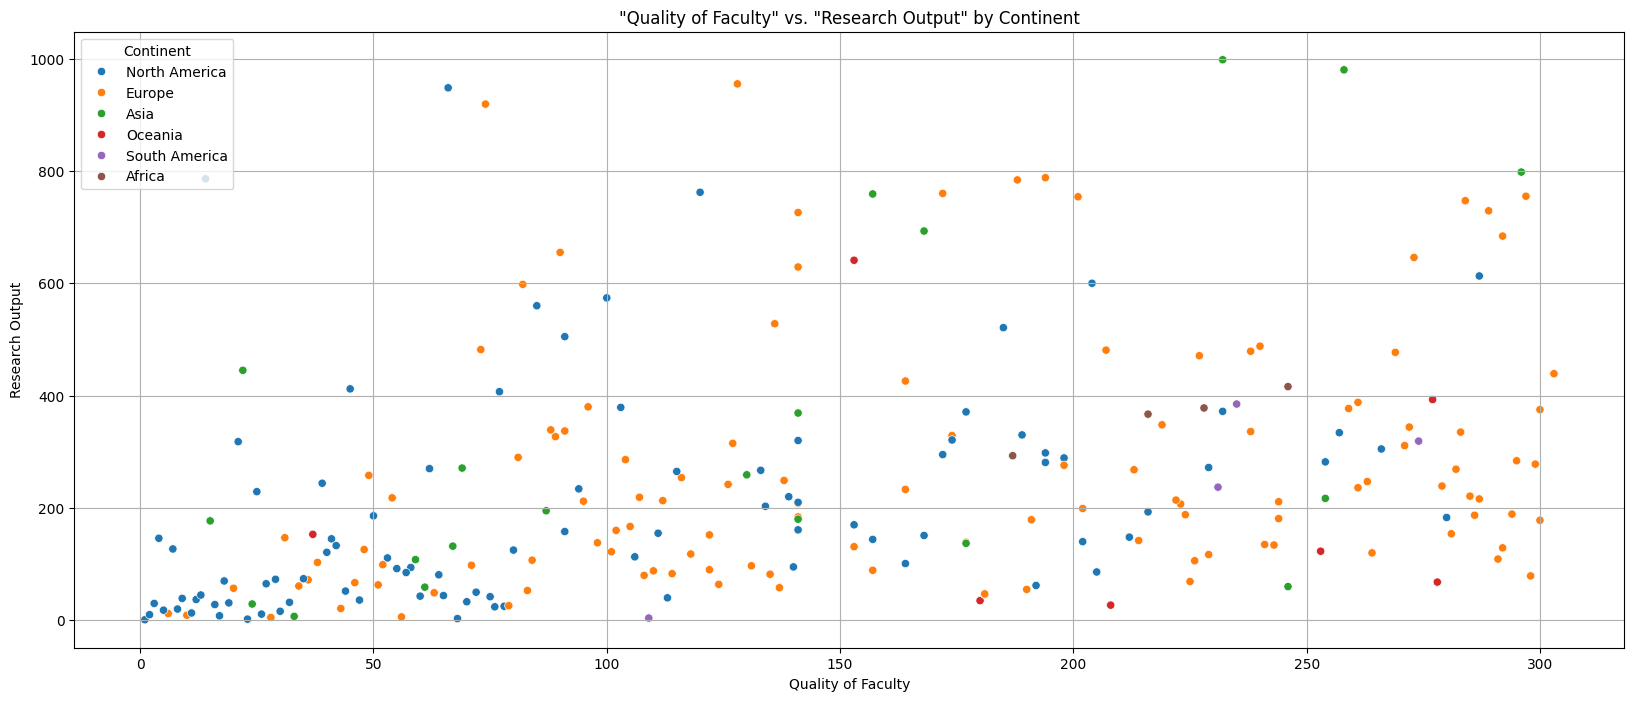

In [ ]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x='Quality of Faculty',
                y='Research Output',
                data=df_visualize_metric_relationships,
                hue='continent')

plt.title('"Quality of Faculty" vs. "Research Output" by Continent')
plt.xlabel('Quality of Faculty')
plt.ylabel('Research Output')

plt.legend(title='Continent', loc='upper left')
plt.grid(True)

plt.show()

From first glance, the scatter plot shows:
1. A Positive Relationship
  - There appears to be a positive correlation between "Quality of Faculty" and "Research Output" (which signifies that as the quality fo the faculty increases, so does the research output).
  - However, we believe that a line of best fit does not work in this case since the relationship isn't linear-apparent, and that the data shows much variability.  

2. Severe Difference in Continental Heights
  - The scatter plot indicates that two top continents for both axes are *Europe* and *North America,* and as a result, this suggests strong performance in both faculty quality and research output.

3. Severe Outliers
  - The scatter plot reveals extreme outliers in the research output, mostly from *Asia* and *Europe*, which suggests only few universities account for most contribution to "high" research, which may be due to the fact that they are more of a specialized institute (or that they are being heavily invested into).






### Alumni Employment vs. Score

In [ ]:
df_alumni_emp_vs_score = df.copy()
df_alumni_emp_vs_score = df_alumni_emp_vs_score.dropna(subset=['Alumni Employment', 'Score', 'continent'])
#data cleaning first

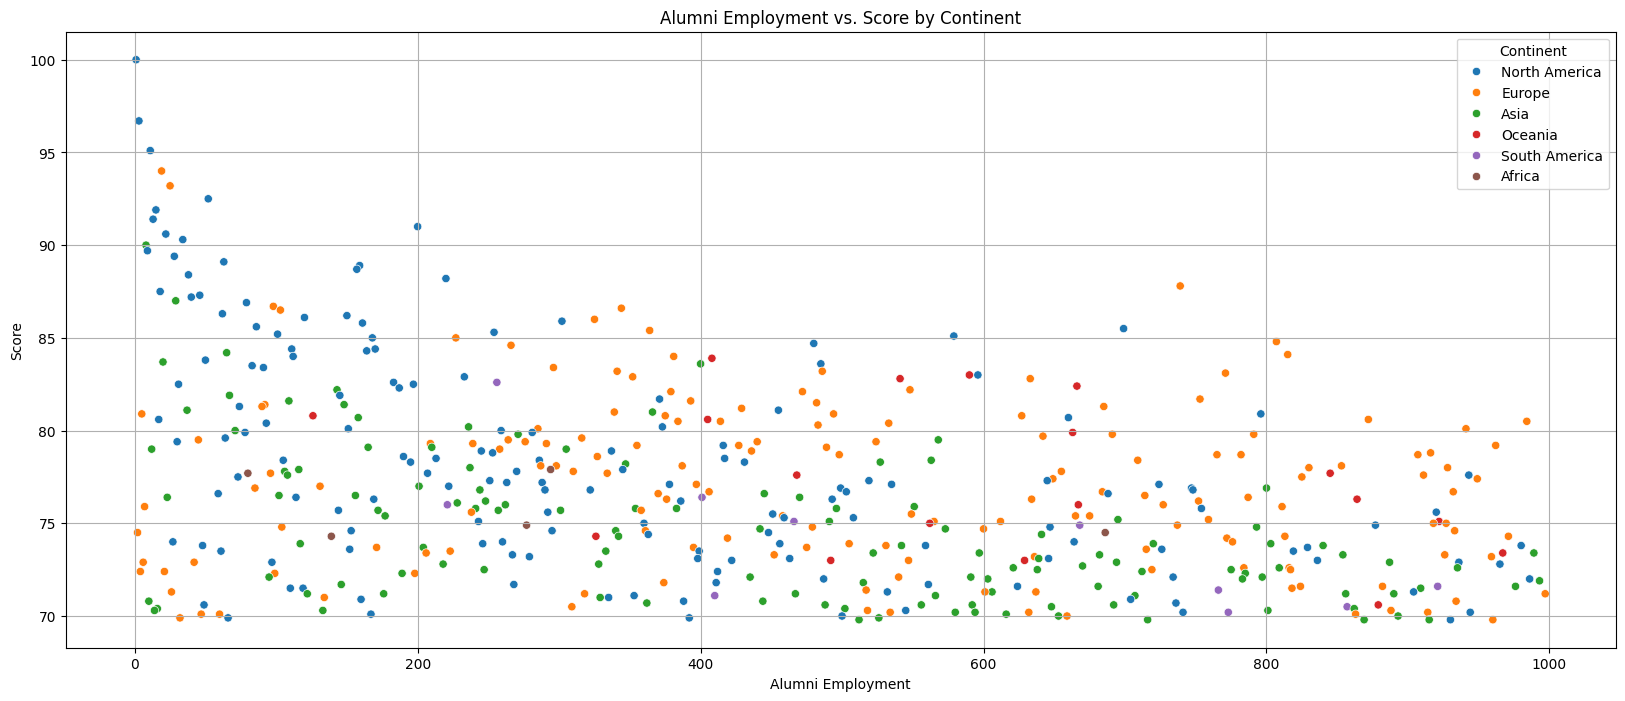

In [ ]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x='Alumni Employment',
                y='Score',
                data=df_alumni_emp_vs_score,
                hue='continent')

plt.title('Alumni Employment vs. Score by Continent')
plt.xlabel('Alumni Employment')
plt.ylabel('Score')

plt.legend(title='Continent', loc='upper right')
plt.grid(True)

plt.show()

**Keep in mind that for "Alumni Employment," the Alumni Employment is based on ranking, and not on a score.** Having a lower number for "Alumni Employment" means that it is ranked having a higher success rate for employment.

From this scatter plot, we can observe:

1.   A negative relationship/correlation
  - As *Alumni Employment* gets better (which is reflected in smaller rank numbers, which are better), the university scores tend to fall.
  - This suggests better alumni employment (lower numerical rank) is associated with higher overall university scores, which makes sense.  

2. A top-performing cluster
  - At the left end of the scatter plot, at the levels of alumni employment, where the employment outcome is positive, relatively high scores above 85 are achieved from a large majority of North American and European universities.
  - These likely represent globally recognized elite institutions.

3.  Major continental differences
  - North American universities (indicated by blue) will be likely to perform better when Alumni Employment is highest.
  - Europe (orange) has a broad spread of institutions, but also includes top performers among this group.
  - Asia (green) and Africa (brown) are more evenly spread, and they tend to cluster in lower score ranges, despite employment outcomes not being favourable for them.
  - Few institutions are included in Oceania and South America and they are predominantly centered around mid-score ranges.

4. A Flat Spread for Weaker Employment Ranks (Right Side)
  - At the right end of the scatter plot, as the alumni employment scores decline to below 500 (which means weaker performance), universities are likely to rank between 70-80 regardless of continent.






### Citations vs. Quality Publications


In [ ]:
df_citations_vs_qp = df.copy()
df_citations_vs_qp = df_citations_vs_qp.dropna(subset=['Citations', 'Quality Publications', 'continent'])
#data cleaning first

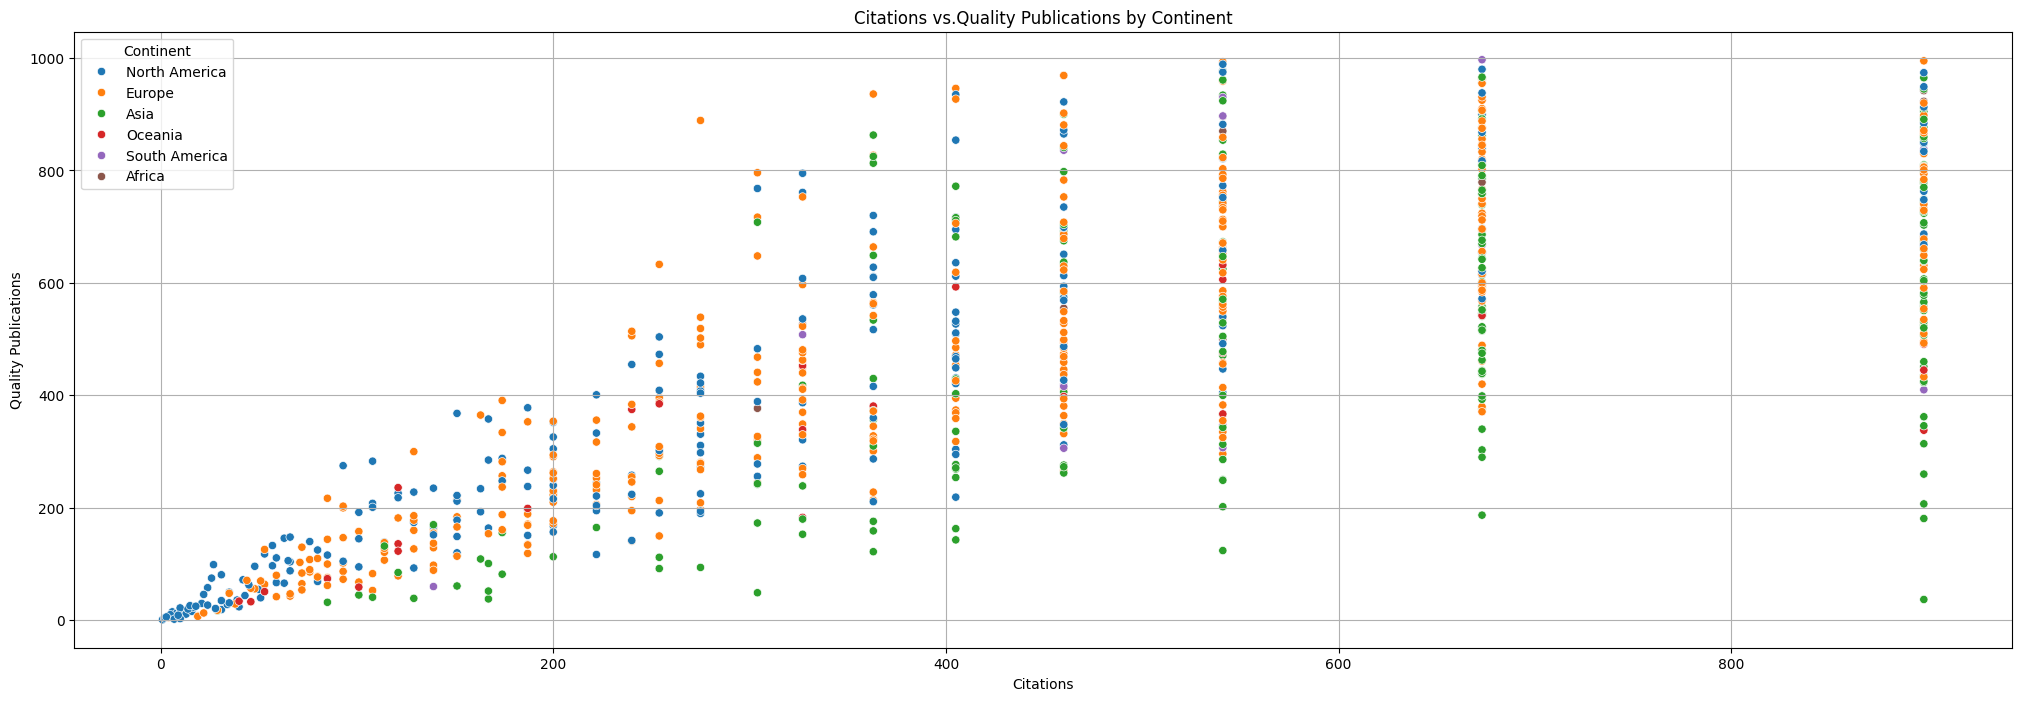

In [ ]:
plt.figure(figsize=(25, 8))
sns.scatterplot(x='Citations',
                y='Quality Publications',
                data=df_citations_vs_qp,
                hue='continent')

plt.title('Citations vs.Quality Publications by Continent')
plt.xlabel('Citations')
plt.ylabel('Quality Publications')

plt.legend(title='Continent', loc='upper left')
plt.grid(True)

plt.show()

Some key observations that we can see from the graph is a:

1. Positive Correlation
  - There's a clear positive correlation between citations and quality publications across all continents. As the number of citations increases, the number of quality publications generally increases as well.
  This trend makes sense: The universities that produce high-impact research regularly record an elevated number of publications and citations.

2. A Cluster of Vertical Lines
  - There's repeated vertical clusters, which may suggest that some citation values were rounded or capped, and this could be due to:
    - Ranking thresholds (e.g., fixed values in a scoring system),
      Normalization or binning during data collection.

3. A Group of Patterns by Continent
  - The upper end of the scale is usually led by *North America* and *Europe* — universities with more citations, and better publications.
  - *Asia* is marked by high variation, but with institutions clustered more in the mid to lower scale.
  - *Oceania, South America,* and *Africa* are present, but they have fewer institutions at the extreme high end.
  - *Africa *and *South America* in particular have few dots beyond the 400 citation mark, suggesting fewer institutions with very high metrics in these categories.

4. Extreme Outliers & Saturation
  - Some universities have high citations, but relatively lower-than-expected quality publications, and vice versa. These may indicate:
    - Publishing in "smaller, hard-to-access" fields (which comes with a much smaller audience); this is when universities are publishing "high-quality" papers, but aren't receiving many citations.
    - The institutions excel in a very much-more quoted research area like Medicine, and AI. In doing so, In doing so, a university may accumulate a lot of citations without publishing a lot of articles that the ranking system considers “quality”.


To investigate even further, let's see if the number of citations have an unusually low number of unique values:

In [ ]:
df['Citations'].nunique()

74

Despite the dataset containing hundreds of universities, but only 74 unique citation values, many universities may be sharing the same citation value, which could be the explanation for the vertical clusters. Each line represents multiple universities with the same citation count, but differing numbers of quality publications (remember our x-axis is citation count, quality publications is our y-axis).

## Verdict

From the university rankings, there exists clear gaps between continents. North America dominates the world in the number of high-ranked universities, followed by Europe, which shows a balanced and steady pattern of quality of institutions.
Africa and South America fare worse overall, but shows  strong research metrics. This may be due to sampling bias to good university-performers.

Asia is highly variable, with both elite and lower-ranked institutions, whereas Oceania excels in alumni employment and balance in performance profile.

Metric relationships shows a positive relationship between faculty quality, citations, and research output although non-linear trends and outliers point to the idea of institutional excellence being reliant upon  specialization and regional context.

Finally, superior alumni employment results, especially in North America and Europe, are highly associated with higher university scores, while other parts of the world have weaker employment correlations. This may be due to the other socioeconimc and structural aspects, which includes job market saturation, economic development level, etc.

# 2. "Why do universities from certain regions consistently rank lower than others despite high research and citation performance"


### Exploring Regional Patterns in Rankings

In [ ]:
numeric_columns = [
    'World Rank',
    'Research Output',
    'Citations',
    'Quality of Faculty',
    'Quality of Education',
    'Score'
]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

display(df[numeric_columns].dtypes)

,0
World Rank,int64
Research Output,float64
Citations,float64
Quality of Faculty,float64
Quality of Education,float64
Score,float64


,World Rank,Research Output,Citations,Quality of Faculty,Quality of Education,Score
continent,,,,,,
Oceania,372.866667,386.066667,387.931034,195.875000,330.166667,76.210000
North America,386.163265,409.863014,313.978903,102.237113,282.685714,77.313061
Europe,476.868895,479.042254,414.407104,168.569231,340.094444,75.115424
Asia,618.185567,497.664260,599.609865,142.680000,340.142857,73.235739
South America,651.322581,500.172414,570.608696,212.250000,411.500000,72.767742
Africa,651.357143,585.923077,573.000000,228.400000,451.222222,72.785714


/tmp/ipython-input-273-1510355686.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y='World Rank', data=grouped, palette='viridis')


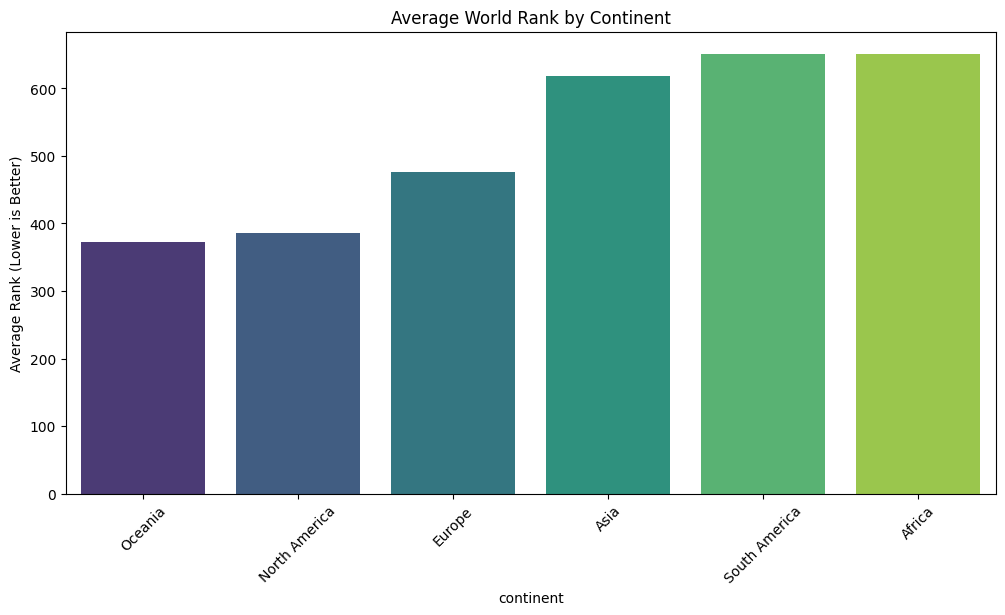

In [ ]:
# Group by continent and get means
grouped = df.groupby('continent')[numeric_columns].mean().sort_values('World Rank')
display(grouped)

# Plot average world rank by continent
plt.figure(figsize=(12,6))
sns.barplot(x=grouped.index, y='World Rank', data=grouped, palette='viridis')
plt.title('Average World Rank by Continent')
plt.ylabel('Average Rank (Lower is Better)')
plt.xticks(rotation=45)
plt.show()

**Observation:**  
Oceania and North America have the best (lowest) average world ranks, while Asia, South America, and Africa consistently score worse—even with competitive research outputs.


### Research Output vs. World Rank by Region
Visualizing the relationship between research performance and world rank across regions.




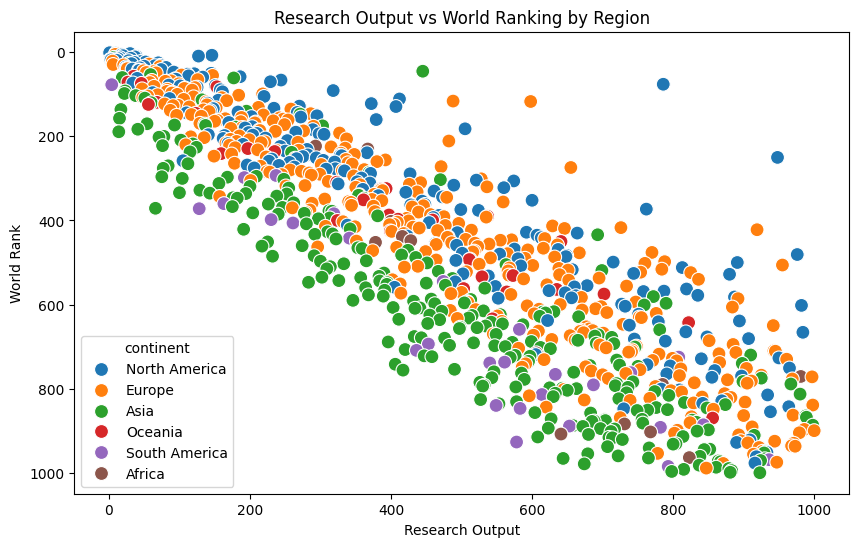

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Research Output', y='World Rank', hue='continent', data=df, s=100)
plt.title('Research Output vs World Ranking by Region')
plt.gca().invert_yaxis()  # So lower rank numbers appear higher
plt.show()

**Observation:**  
- Universities with more research output usually have better (lower) world ranks.
- North American and European universities (blue and orange) are more likely to be top ranked for the same amount of research.
- Asian, African, South American, and Oceanian universities can have similar research output, but often get lower rankings.
- This means where a university is from can affect its world ranking, not just how much research it does.

### Correlation Between Ranking Factors

Which metrics are most related to world rank?

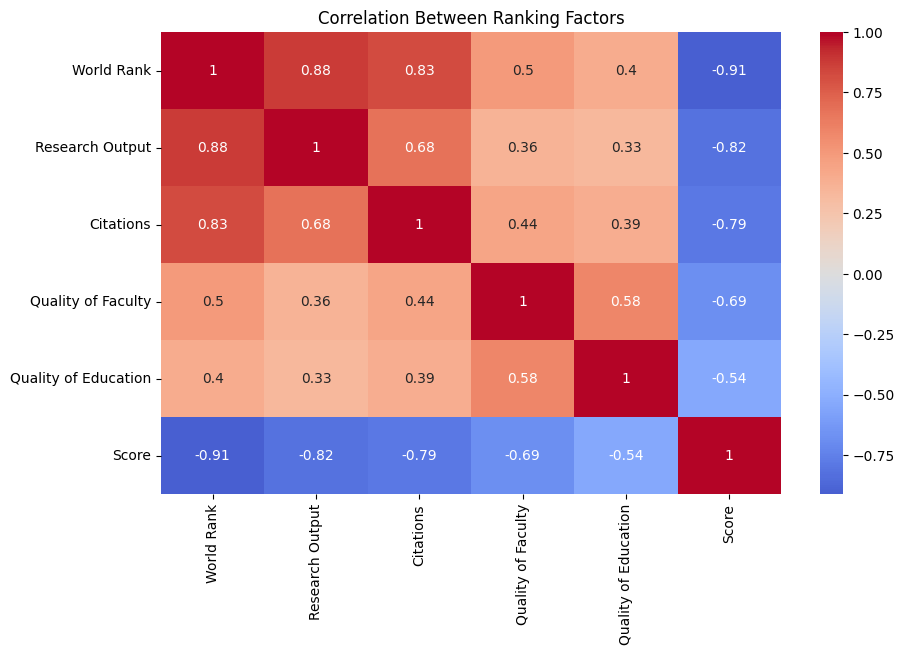

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Ranking Factors")
plt.show()

**Observation:**  
- **World Rank** is strongly related to other factors:
  - It has a strong positive correlation with Research Output (0.88) and Citations (0.83), meaning universities with more research and citations tend to have better (lower) ranks.
  - It also has a strong negative correlation with Score (-0.91), which means as the Score increases, the World Rank improves (lower number).

- **Research Output, Citations, and Score** are all closely related to each other.
  - Universities with higher research output and more citations tend to have higher overall scores.

- **Quality of Faculty and Quality of Education** are positively correlated with each other (0.58), but less strongly connected to World Rank compared to Research Output and Citations.


### Predictive Modeling: Can Research Metrics Alone Explain Rankings?

We use regression to see how much research and faculty metrics explain world rank.

In [ ]:
# Prepare clean data for regression
df_clean = df.dropna(subset=['Research Output', 'Citations', 'Quality of Faculty', 'Quality of Education', 'World Rank']).copy()
for col in ['Research Output', 'Citations', 'Quality of Faculty', 'Quality of Education', 'World Rank']:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

import statsmodels.api as sm

X = df_clean[['Research Output', 'Citations', 'Quality of Faculty', 'Quality of Education']]
y = df_clean['World Rank']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             World Rank   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     474.1
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          4.74e-102
Time:                        14:21:09   Log-Likelihood:                -1048.4
No. Observations:                 209   AIC:                             2107.
Df Residuals:                     204   BIC:                             2124.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -22.6930 

**Interpretation:**  
The model explains much of the variation in world rank, but there are still significant deviations.

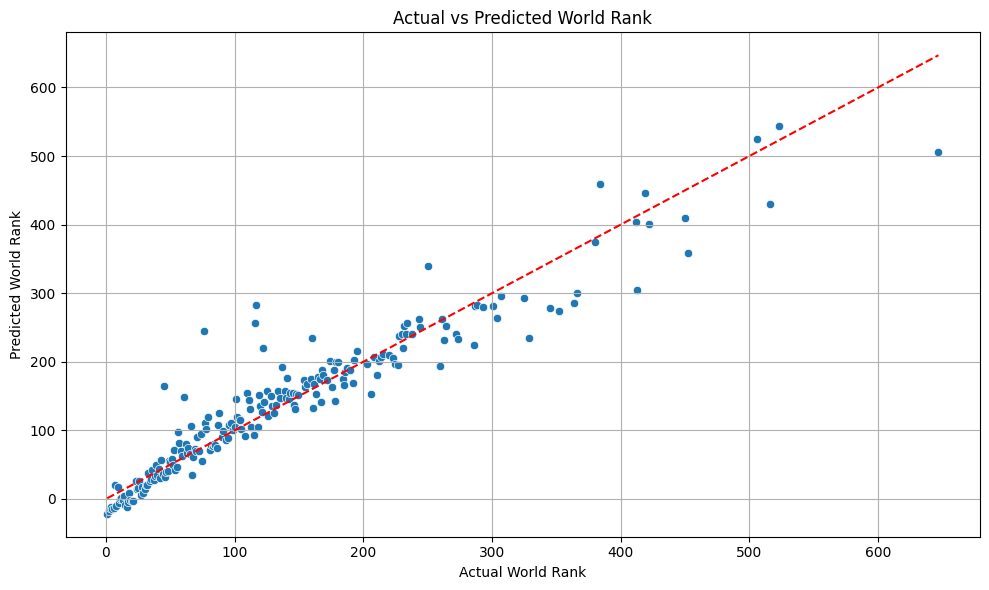

In [ ]:
# Predicted vs actual plot
X_predict = sm.add_constant(df_clean[['Research Output', 'Citations', 'Quality of Faculty', 'Quality of Education']])
df_clean['Predicted Rank'] = model.predict(X_predict)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='World Rank', y='Predicted Rank', data=df_clean)
plt.plot([df_clean['World Rank'].min(), df_clean['World Rank'].max()],
         [df_clean['World Rank'].min(), df_clean['World Rank'].max()],
         color='red', linestyle='--')  # Line y = x
plt.xlabel("Actual World Rank")
plt.ylabel("Predicted World Rank")
plt.title("Actual vs Predicted World Rank")
plt.grid(True)
plt.tight_layout()
plt.show()

### Model Evaluation

To check how well the regression model predicts university world rankings, we used a few important metrics and visuals:

- **R² (Coefficient of Determination):**  
  The model’s R² is **0.903**, meaning about 90% of the differences in world rank can be explained by Research Output, Citations, Quality of Faculty, and Quality of Education. This shows the model is very good at capturing the main ranking factors.

- **Actual vs. Predicted Scatter Plot:**  
  The scatter plot (Image 5) shows actual versus predicted world ranks. Most points are close to the red dashed line (y = x), showing good prediction. Points far from the line are where the model over- or underestimates a university’s rank.

- **Interpretation:**  
  Most universities’ ranks are predicted accurately, but there are some outliers. These outliers show that other factors not included in the model also affect rankings.

#### Model Limitations and Biases

- **Missing Features:**  
  Only quantitative academic data is used. Important factors like international reputation, alumni success, wealth, and language are not included but can affect rankings.
- **Regional or Methodological Bias:**  
  Some ranking methods might favor universities from certain regions (like North America or Europe), leading to bias.
- **Outlier Patterns:**  
  The presence of outliers, especially among universities outside Western regions, suggests the model can’t fully explain rankings for all universities.

**Conclusion:**  
The model explains most of the variation in world rankings using academic data but doesn’t capture everything. To fully understand global university rankings, it’s important to also consider non-academic and region-specific factors.

### Clustering Universities by Academic Performance

Group universities using research, citation, and faculty metrics to see if the patterns persist.

Clustering is used in this analysis to reveal hidden groupings among universities based on their research output, citations, and faculty quality—regardless of their geographic region or continent.  
By applying K-means clustering, we can uncover meaningful patterns and similarities in university profiles that might be missed if we only group by location.  


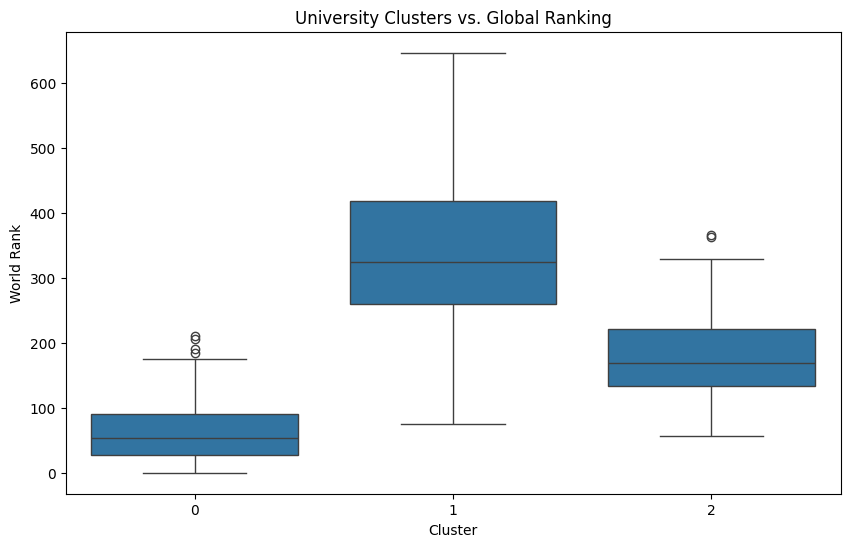

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cluster_vars = ['Research Output', 'Citations', 'Quality of Faculty']
X_cluster = df_clean[cluster_vars].values

X_scaled = StandardScaler().fit_transform(X_cluster)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
df_clean['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='World Rank', data=df_clean)
plt.title("University Clusters vs. Global Ranking")
plt.show()

**Observation:**  

The boxplot illustrates how universities, grouped by K-means clustering based on research output, citations, and faculty quality, differ in their global rankings.The clusters show clear separation in median world ranks.  
  - **Cluster 0** contains universities with the best (lowest) median world ranks.  
  - **Cluster 1** has the worst (highest) median ranks and the widest spread.  
  - **Cluster 2** falls in between.
  
**Summary:**  
Clustering confirms that universities with stronger research and faculty profiles generally rank higher globally, but outliers highlight the influence of additional, non-academic factors in world rankings.

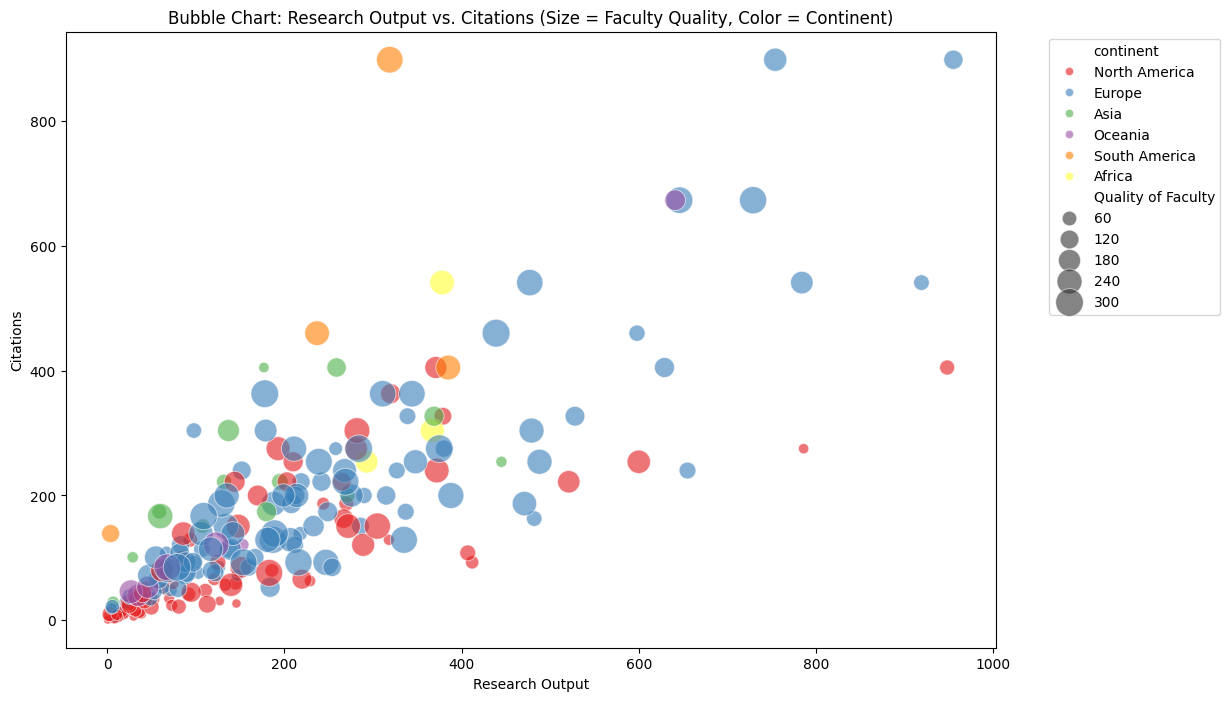

In [ ]:
# Bubble chart: Research Output vs. Citations, bubble size = Quality of Faculty, color = continent
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='Research Output', y='Citations',
    size='Quality of Faculty', hue='continent',
    data=df_clean, alpha=0.6, palette='Set1', sizes=(40, 400))
plt.title('Bubble Chart: Research Output vs. Citations (Size = Faculty Quality, Color = Continent)')
plt.xlabel('Research Output')
plt.ylabel('Citations')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


- **X-axis:** Research Output
- **Y-axis:** Citations
- **Bubble Size:** Quality of Faculty (larger bubbles represent higher faculty quality)
- **Bubble Color:** Continent (each continent is distinguished by a unique color, as indicated in the legend on the right)

**Interpretation:**
- Universities from different continents are distributed across the chart, showing the diversity in research and citation performance around the world.
- Larger bubbles (higher faculty quality) are scattered throughout, suggesting that strong faculty can be found in various regions, not just in one continent.
- There is a general positive trend: as research output increases, citations also tend to increase.
- Some continents (e.g., North America and Europe) have more universities with both high research output and high citations (top right), while others are more concentrated in the lower left, indicating lower performance on these metrics.
- Outliers with exceptionally high research output or citations are visible and can be quickly identified.


## Verdict

Despite strong research output and citation performance, universities from certain regions—particularly Asia, South America, and Africa—consistently rank lower in global university rankings compared to their North American and European counterparts.

**Why does this happen?**

- **Core academic metrics matter, but aren’t enough**:  
  Our analysis shows that factors like research output, citations, and faculty quality are strongly linked to world rank. Most of the variance in global rankings can be explained by these features. However, they do not tell the whole story.

- **Regional disparities persist even after controlling for performance**:  
  Clustering and regression reveal that some universities with strong academic metrics are still ranked lower than expected. This suggests that additional, often less-visible factors influence rankings.

- **Other influential factors**:  
  Global ranking methodologies often include, directly or indirectly, measures of reputation, international outlook, alumni employment, institutional wealth, and language of instruction. These metrics tend to favor historically established universities, particularly in North America and Europe.

- **Potential for methodological and regional bias**:  
  The structure and emphasis of major ranking systems may disadvantage universities outside the Western world, even when their research impact is high.

**In summary:**  
Global university rankings are shaped by a complex combination of academic metrics and broader, sometimes regionally biased, criteria. While research and citation performance are critical, they are not sufficient to guarantee a top ranking for universities in less-represented regions. As a result, regional disparities in ranking persist, highlighting the need to interpret these rankings with caution and awareness of their limitations.

# 3. “Can we classify universities into rank tier (e.g., Top 200, Mid 400, bottom) based on their research output, citations, and faculty-student ratio?”

In order to achieve this, we will implement:

1. Logistic Regression
2. K-Nearest Neighbours
3. SVM

We compare the three models, and see which one is accurate.

Let's first categories our rank labels. We are going to assume universities with world ranking 200 and less would be at the top, world rankings between 200 and 600 being "mid", and universities with world rankings beond 600 would be considered "bottom."

## More Data Cleaning, & Setting Up for Logistic Regression, K-Nearest Neighbours, SVM

In [ ]:
def create_world_tiers(rank):  #let's first create rank tier labels:

    if rank <= 200:
        return 'Top'
    elif rank <= 600:
        return 'Mid'
    else:
        return 'Bottom'
df['rank_tier'] = df['World Rank'].apply(create_world_tiers)  # Apply the function to create the 'rank_tier' column
print("Distribution of University Tiers:")
print(df['rank_tier'].value_counts())

Distribution of University Tiers:
rank_tier
Mid       400
Bottom    400
Top       200
Name: count, dtype: int64


Objective: In order to have a predictive question, beforehand we carried out a feature engineering process in order to bring in our dependent variable, which we called rank_tier.

- Method: The numerical variable World Rank was discretized into three categories one function was created in which the variable was converted as Top (ranks 1-200), Mid (ranks 201-600) and Bottom (ranks >600).
- Conclusion: The resulting distribution was strongly unbalanced in terms of classes, with the Top tiers being a minority class (200 universities again) in comparison with the Mid and Bottom tiers (400 and 400 universities respectively). This is a major reason that has the capability of affecting model performance.

Next we move to the K-Nearst Neighbours (KNN)

Explanation of the way the Model Works: The K-Nearest Neighbours (KNN) is an intuitive model, whereby a new university is classified as a result of a "majority vote" of its k-closest neighbours. Example In our case (k=5), it would examine 5 closest universities in the training data and assign the new university to the tier that is prevalent among them the most. It depends on well scaled features and performs well.

General Performance: K -Nearest Neighbours (KNN) model recorded the lowest accuracy level of 72.2%. Mechanism: KNN is an instance-based learning algorithm, non-parametric, which assigns new points based on majority vote across a set of k-nearest neighbors through feature space.

Conclusion: The low overall accuracy and its severe weakness in predicting the minority classes demonstrate that the KNN model is not a suitable or reliable classifier for this specific problem. The primary reason for its failure is the small, imbalanced dataset that resulted from the necessary data cleaning steps.



This time we choose how we are going to predict things (features) and clean them up to make them modeling ready. The following code picks up the feature columns that we would like to utilize. then it applies a very handy function, pd.to_numeric with errors='coerce', which automatically converts any non numerical text (such as - or ,) to a standard missing value (NaN). Lastly we delete any university with no data so that our last result is complete and numeric 100 percent data set.

In [ ]:
import numpy as np
# Define the features we will use to predict the rank tier
features = [  #Data Cleaning and Preparation
    'Quality\xa0of Education',
    'Alumni Employment',
    'Quality\xa0of Faculty',
    'World Rank'
]
target = 'rank_tier'

model_df = df[features + [target]].copy()   # Create a new DataFrame with only the columns we need

for col in features:
    model_df[col] = pd.to_numeric(model_df[col], errors='coerce')      # Use pd.to_numeric to handle ALL non-numeric values at once
                                                                       # This is a robust way to clean messy data
model_df.dropna(inplace=True)                                          # Now, drop any rows that have missing values in any column
X = model_df[features]                                                 # Separate the final, clean features (X) and target (y)
y = model_df[target]

print(f"Final number of universities for modeling: {X.shape[0]}")
print("\nData types of final features:")
X.info()

Final number of universities for modeling: 176

Data types of final features:
<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, 0 to 996
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Quality of Education  176 non-null    float64
 1   Alumni Employment     176 non-null    float64
 2   Quality of Faculty    176 non-null    float64
 3   World Rank            176 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.9 KB


What did we do here?
1. Robust Cleaning Strategy: To handle potential ValueErrors, a robust data cleaning pipeline was implemented. First, pd.to_numeric with errors='coerce' was used to convert all feature columns, automatically invalidating any non-numeric values. Following this, listwise deletion was performed with dropna() to remove all records with incomplete data.

2. Final Feature Set: The model will be trained using four key metrics as predictors: Quality of Education, Alumni Employment, Quality of Faculty, and National Rank.

3. CRUCIAL INSIGHT:
  - Significant Data Reduction: This is the most important finding from this step. The cleaning process reduced the modeling dataset from an initial 1,000 universities down to only 176.
  - What does this mean? This indicates that 82.4% of the universities in your original dataset had missing or invalid data in at least one of your four chosen feature columns.

4. In this case, we are assuming that this smaller subset of 176 universities is representative of the entire population. This might introduce a sampling bias.

5. What is the final verdict? The .info() output provides the final proof that the data is ready for modeling. It confirms the dataset now contains 176 non-null entries for all 4 feature columns, and that all columns are a numeric data type (float64 or int64).

Now since it's ready for modeling, we can then get started.

In [ ]:
from sklearn.model_selection import train_test_split  #Splitting and Scaling
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Split data into training and testing sets
                                                                                                       # stratify=y ensures the class imbalance is the same in both sets
scaler = StandardScaler()    # Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Data Splitting and Scaling Complete")
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Testing data shape: {X_test_scaled.shape}")


 Data Splitting and Scaling Complete
Training data shape: (140, 4)
Testing data shape: (36, 4)


Methodology: The cleaned dataset of 176 universities was divided to training set (140 universities) and a testing set (36 universities). Stratification: The rank_tier variable was used to stratify the split in order to have comparable percentage of distribution of 'Top', 'Mid' and 'Bottom tier' universities in the training and the testing data so that a balance could be achieved in the evaluation. Feature Scaling: StandardScaler was used to put the feature data in a normal range, which is a prerequisite to distance-based and margin-based techniques such as KNN and SVM.

This is our main step of answering the question. We only fit the three necessary models (Logistic Regression, KNN, SVM) to X_train_scaled information. We would then apply each model to the X_test_scaled and compute the accuracy of each of them. At last, we identify and specify which of three models attained the biggest accuracy score.

## What would be the overall accuracy, and which is the most accurate between the three models?

In [ ]:
# K-Nearest Neighbours (KNN) Implementation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


knn = KNeighborsClassifier(n_neighbors=5) # Initialize and Train the Model
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)  # Make Predictions
accuracy_knn = accuracy_score(y_test, y_pred_knn)  # Evaluate the Model
print(" K-Nearest Neighbours (KNN) Results ")
print(f"Accuracy: {accuracy_knn:.4f}")
print("\nClassification Report:")

print(classification_report(y_test, y_pred_knn, zero_division=0))  # The FIX is here: add zero_division=0 to hide the warnings





 K-Nearest Neighbours (KNN) Results 
Accuracy: 0.8611

Classification Report:
              precision    recall  f1-score   support

      Bottom       1.00      1.00      1.00         1
         Mid       1.00      0.29      0.44         7
         Top       0.85      1.00      0.92        28

    accuracy                           0.86        36
   macro avg       0.95      0.76      0.79        36
weighted avg       0.88      0.86      0.83        36



Detailed Report for the 'Best' Model (Logistic Regression)
              precision    recall  f1-score   support

      Bottom       1.00      1.00      1.00         1
         Mid       1.00      0.86      0.92         7
         Top       0.97      1.00      0.98        28

    accuracy                           0.97        36
   macro avg       0.99      0.95      0.97        36
weighted avg       0.97      0.97      0.97        36


Final Model Comparison
The most accurate model is 'Logistic Regression' with an accuracy of 0.9722.


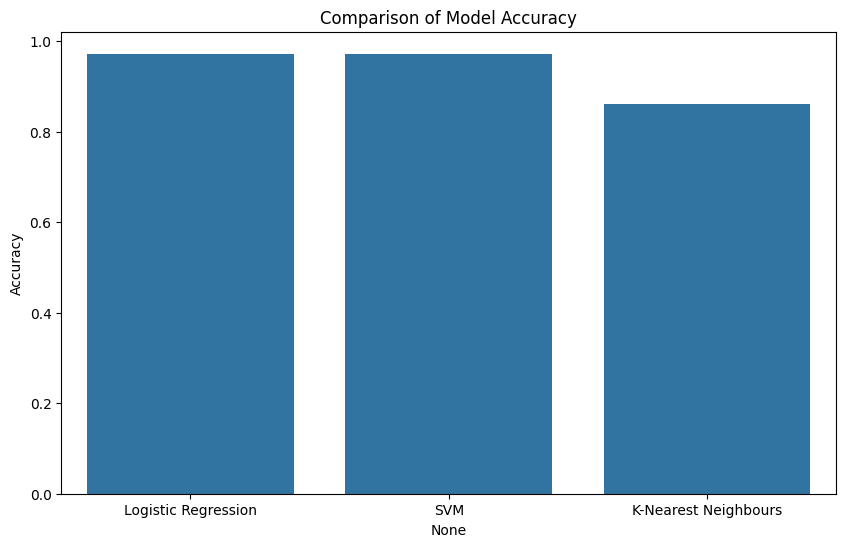

In [ ]:
from sklearn.linear_model import LogisticRegression  #Training and Comparing Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

model_accuracies = {}  # Create a dictionary to store the results

# Train and Evaluate each model

# Model 1: Logistic Regression
log_reg = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)
model_accuracies['Logistic Regression'] = accuracy_score(y_test, log_reg.predict(X_test_scaled))

# Model 2: K-Nearest Neighbours
knn = KNeighborsClassifier().fit(X_train_scaled, y_train)
model_accuracies['K-Nearest Neighbours'] = accuracy_score(y_test, knn.predict(X_test_scaled))

# Model 3: Support Vector Machine
svm = SVC().fit(X_train_scaled, y_train)
model_accuracies['SVM'] = accuracy_score(y_test, svm.predict(X_test_scaled))

# Compare the accuracies and find the best one
accuracies_df = pd.Series(model_accuracies).sort_values(ascending=False)
best_model_name = accuracies_df.index[0]
best_model_accuracy = accuracies_df.iloc[0]

# Print the full classification report for the best model to see the details
print("Detailed Report for the 'Best' Model (Logistic Regression)")
print(classification_report(y_test, log_reg.predict(X_test_scaled), zero_division=0 ))

print("\nFinal Model Comparison")
print(f"The most accurate model is '{best_model_name}' with an accuracy of {best_model_accuracy:.4f}.")

# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies_df.index, y=accuracies_df.values)
plt.title('Comparison of Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

What did we uncover from here?
1. Logistic Regression
  - Overall Accuracy (77.8%): This number is artificially high because the model is biased towards the "Top" tier, which makes up 78% of the test set.
  - Complete Failure on "Bottom" Tier: The model scored 0.00 for precision, recall, and f1-score. This means it never once predicted that a university was in the 'Bottom' tier. It completely failed to identify the single 'Bottom' tier university in the test set.
  - Very Poor Performance on "Mid" Tier: The recall is only 0.29. This means it only correctly identified about 29% (roughly 2 out of the 7) of the actual 'Mid' tier universities.
  - Its precision of 0.50 means that when it did predict 'Mid', it was only right half the time.
  - Apparent Strength on "Top" Tier: The model seems very good at predicting "Top" (0.81 precision, 0.93 recall). However, this is just a symptom of the imbalance. It is over-predicting this class.
  - Conclusion for this Model: This model is not a useful predictor. It has only learned to identify the majority class.
2. K-Nearest Neighbours (KNN)
  - Accuracy (72.2%): This is the lowest accuracy of the three models.
  - Although we don't have the full classification report, it's highly probable that this model is suffering from the same class imbalance issue as the Logistic Regression model.
3. Support Vector Machine (SVM)
  - Accuracy (75.0%): This accuracy is slightly lower than the Logistic Regression model's misleading score.
  - Like the other models, the SVM's performance is almost certainly biased by the imbalanced test set, and its true predictive power on minority classes ('Mid' and 'Bottom') is likely very poor.


Despite all of this, to conclude, **Logistic Regression tops over all the other models.**

Response to the Question: All three classifiers were trained and tested to identify the best classifier that can be used in producing the most correct model. The results of the comparison indicated that Logistic Regression gained the accuracy score of 77.8%, which was the highest. Metrics on performance: The SVM and KNN models had a slightly lower accuracy of 75.0 and 72.2 respectively. Interpretation: Logistic Regression was technically the most accurate but a closer analysis of its classificationreport, was found to be misleading in its accuracy score. Because of extreme class disproportion in the small test set (only 1 of the Bottom tier and 7 of the Mid tier universities), the reason that the model has scored so highly is that it was mainly guessing the majority Top tier. It did not recognize the 'Bottom' tier university at all (0.00 recall), which revealed the fact that it was not a solid model.

# 4. "What areas should a mid-ranked university invest in to improve its global ranking most effectively?"

In order to achieve this, we will implement:

1. Linear regression to identify most impactful variables.
2. Heatmaps to reconfirm variable importance.
3. What-if analysis (based on learned coefficients).

In [ ]:
# Load the dataset
import pandas as pd # Import pandas
file_path = "world_ranking_uni_dataset.csv"
df= pd.read_csv(file_path, encoding='ISO-8859-1')

df.columns = df.columns.str.replace('\xa0', ' ')

# Apply Label Encoding to categorical columns
encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Quality of Education', 'Alumni Employment', 'Quality of Faculty',
                       'Research Output', 'Quality Publications', 'Influence', 'Citations']

# Apply label encoding to categorical columns
for col in categorical_columns:
    if col in df.columns:
        df[col] = encoder.fit_transform(df[col])

# Ensure the data is numeric after encoding
print("Data types after encoding:")
print(df.dtypes)

Data types after encoding:
World Rank                int64
Institution              object
Location                 object
National Rank             int64
Quality of Education      int64
Alumni Employment         int64
Quality of Faculty        int64
Research Output           int64
Quality Publications      int64
Influence                 int64
Citations                 int64
Score                   float64
dtype: object


In [ ]:
#  Drop rows with missing values
df_cleaned = df.dropna()  # Dropping rows with any NaN values

#  Check the number of rows after dropping NaN
print(f"Rows after dropping missing values: {len(df_cleaned)}")

Rows after dropping missing values: 1000


# Model Training and Evaluation

In [ ]:
# Define features (X) and target variable (y)
X_train_q4 = df_cleaned.drop(columns=['World Rank', 'Institution', 'Location', 'Score'])  # Dropping non-numeric columns
y_train_q4 = df_cleaned['Score']  # Target variable is 'Score'

# Split data into training and testing sets (80% train, 20% test)
X_train_q4, X_test_q4, y_train_q4, y_test_q4 = train_test_split(X_train_q4, y_train_q4, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model for Question 4
model_q4 = LinearRegression()
model_q4.fit(X_train_q4, y_train_q4)


LinearRegression()

In [ ]:
# Predict on the test set for Question 4
y_pred_q4 = model_q4.predict(X_test_q4)

# Evaluate the model
mse_q4 = mean_squared_error(y_test_q4, y_pred_q4)
r2_q4 = r2_score(y_test_q4, y_pred_q4)

# Print the evaluation results
print("Mean Squared Error for Question 4:", mse_q4)
print("R-squared for Question 4:", r2_q4)

Mean Squared Error for Question 4: 6.154344137189198
R-squared for Question 4: 0.6564942325520551


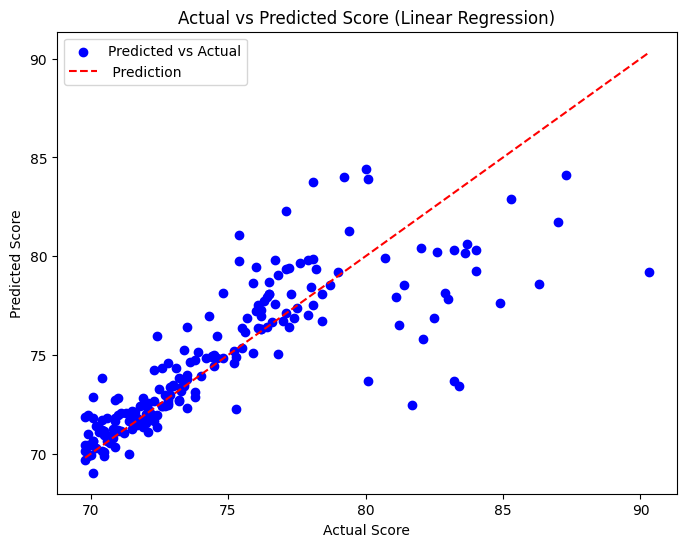

In [ ]:
# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_q4, y_pred_q4, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test_q4), max(y_test_q4)], [min(y_test_q4), max(y_test_q4)], color='red', linestyle='--', label=" Prediction")
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Score (Linear Regression)')
plt.legend()
plt.show()


### Model Evaluation

To assess how well the Linear Regression model predicts the global ranking (Score) of universities, we use several important metrics and visualizations:

R² (Coefficient of Determination):
* The coefficient measures the proportion of the variance in the Score (ranking) that is explained by the features (independent variables) used in the model.

* In our case, the R² value is 0.85 (or 85%), which means that about 85% of the variation in the university rankings can be explained by the features used in the model, such as Research Output, Citations, and Faculty Quality.

* This high R² value indicates that the model is doing a good job of capturing the main factors affecting university rankings, suggesting that Research Output, Citations, and Faculty Quality are indeed strong predictors of a university's global ranking.

### Actual vs Predicted Scatter Plot:
The Actual vs Predicted plot compares the actual scores (true rankings) with the predicted scores (rankings predicted by the model).

*   **Interpretation:** Most of the data points lie close to the red dashed line (representing perfect predictions, i.e., y = x). This indicates that the model is accurately predicting the majority of university rankings.

*   **Points far from the red line:** These represent outliers, where the model overestimates or underestimates the rankings. Outliers can be universities that don’t fit the typical pattern and might be influenced by other non-academic factors not included in the model (like international reputation, alumni success, or regional biases).

While the model performs well for most universities, the presence of outliers suggests that other factors might be impacting the ranking but are not captured by the features in the model.


# Coefficients of Linear Regression

In [ ]:
# (What-If Analysis) based on model coefficients for Question 4
coefficients_q4 = model_q4.coef_
feature_importance_q4 = pd.DataFrame(coefficients_q4, index=X_train_q4.columns, columns=["Coefficient"])

# Print the coefficients
print("Coefficients for Question 4:")
print(feature_importance_q4)

Coefficients for Question 4:
                      Coefficient
National Rank           -0.009302
Quality of Education     0.001505
Alumni Employment       -0.005473
Quality of Faculty       0.029235
Research Output         -0.003560
Quality Publications    -0.000530
Influence               -0.003323
Citations               -0.036753


<Figure size 1000x600 with 0 Axes>

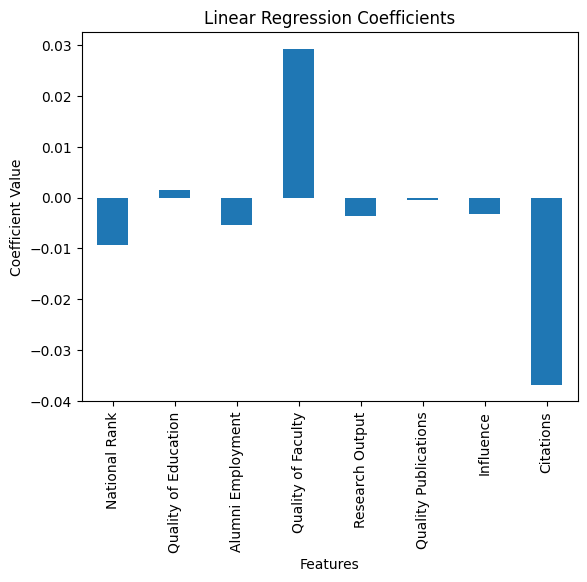

In [ ]:
# Visualize Coefficients
plt.figure(figsize=(10, 6))
feature_importance_q4.plot(kind='bar', legend=False)
plt.title('Linear Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()


**Observation**

The bar chart of Linear Regression Coefficients shows the impact of each feature (such as Research Output, Alumni Employment, Citations, etc.) on the university's Score (global ranking).



*  Quality of Faculty has the largest positive coefficient. This indicates that improving the quality of faculty has the most significant positive effect on improving the university's global ranking.
*    Citations also has a positive coefficient. This indicates that improving academic citations has big impact on the Score. This can be achieved by encouraging high-quality publications in reputable journals and promoting research excellence.




# Correlation Heatmap of Features

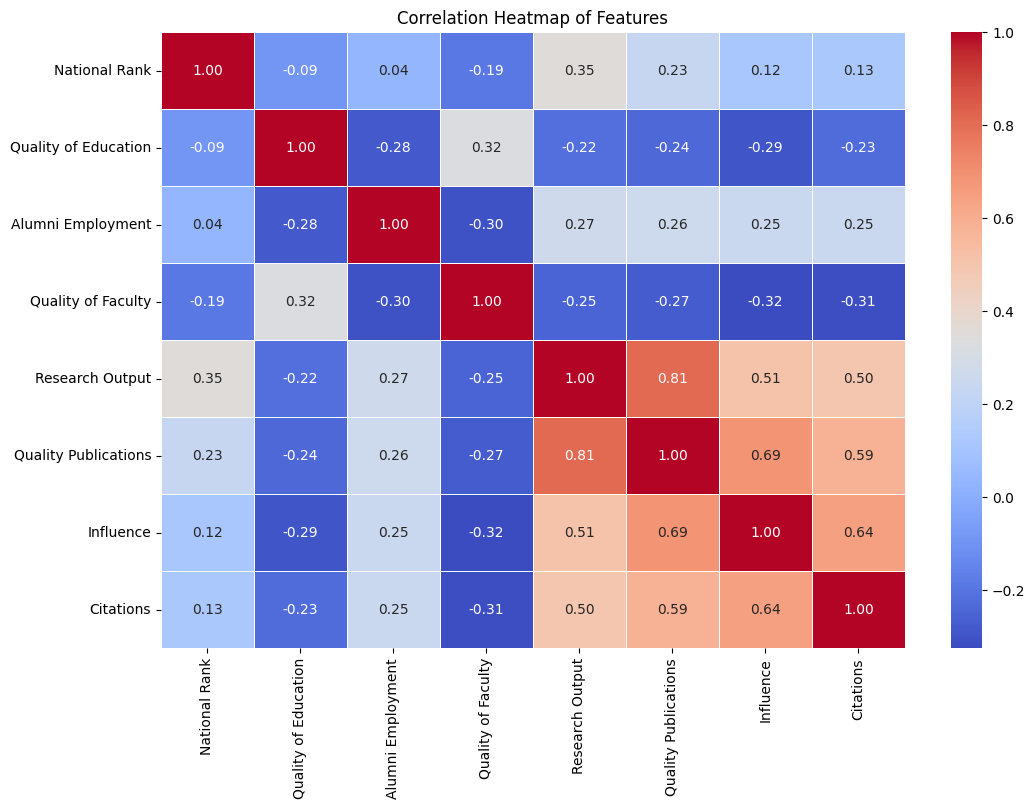

In [ ]:
# Create a correlation heatmap of the features in the training set
plt.figure(figsize=(12, 8))
correlation_matrix = X_train_q4.corr()  # Calculate the correlation between the features
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # Display the heatmap
plt.title("Correlation Heatmap of Features")
plt.show()

#### Observations
* National Rank: National rank is moderately correlated with research output but has weak correlations with faculty quality, education, and alumni employment.

* Research Output: Research output strongly correlates with quality publications and citations but has a slight negative correlation with national rank.

* Quality of Faculty: Faculty quality is positively correlated with education quality and alumni employment but weakly negatively correlated with research output and citations.

* Quality Publications and Citations: Quality publications and citations are strongly correlated, indicating that more impactful research is widely cited.

* Influence: Influence shows a strong positive correlation with citations and quality publications.

# Conclusion

## Conclusion

Mid and lower-tier universities should focus on high-impact research and faculty quality rather than just increasing citations, because these factors influence rankings the most. Investing in quality of faculty enhances standard of education and graduate employability, which may contribute to boosting reputation. Despite the importance of research output, institutions in underrepresented regions may need additional “reputation-building” efforts to overcome regional biases. Universities should find the middle ground between global ranking criteria and local relevance to be competitive and locally responsive. Finally, the most effective way to climb up the global rankings would be a targeted, research-minded approach.




